In [1]:
experiment_name = '25similar'
%load_ext autoreload
%autoreload 2
%matplotlib inline
%run init.py

Created snorkel session from  postgres:///snorkel25similar


/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [3]:
import seaborn as sns
from snorkel.annotations import save_marginals

In [4]:
from snorkel.lf_helpers import *
import pickle,glob

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

Instructions for updating:
Use the retry module or similar alternatives.


In [5]:
import pandas as pd
from MLutils import cohen_kappa_score, plot_marginals_histogram, neg_to_bin_labels

In [6]:
from MLutils import diversity_heatmap, merge_pickles_pred_dicts

In [7]:
# TODO move in LSTM training section

# needed to train the LSTM here
train = session.query(REGULATOR).filter(REGULATOR.split == 0).all()
dev = session.query(REGULATOR).filter(REGULATOR.split == 1).all()
test = session.query(REGULATOR).filter(REGULATOR.split == 2).all()
unlab = session.query(REGULATOR).filter(REGULATOR.split == 3).all()

In [8]:
# Determine mean sentence size per set

In [9]:
# TODO: drop v big sentences

In [10]:
# train_sentence_size =list(map(lambda x: len(x.get_parent().lemmas) ,train))
# dev_sentence_size =list(map(lambda x: len(x.get_parent().lemmas) ,dev))
# test_sentence_size =list(map(lambda x: len(x.get_parent().lemmas) ,test))
# unlab_sentence_size =list(map(lambda x: len(x.get_parent().lemmas) ,unlab))

In [11]:
# print np.mean(train_sentence_size)
# print np.mean(dev_sentence_size)
# print np.mean(test_sentence_size)
# print np.mean(unlab_sentence_size)

In [9]:
session.query(REGULATOR).filter(REGULATOR.split == 3).count()

23509L

In [13]:
# c = train[0]
# s = c.get_parent()
# s.lemmas
# # REGULATOR.get_parent().lemmas

In [10]:
# make sure unmapped cands are gone

In [11]:
from sqlalchemy import  any_,or_,and_

In [12]:
#create list of unmapped cands to drop
to_drop = []
for k in range(3):
    query = session.query(REGULATOR).filter(and_(REGULATOR.split==k,~REGULATOR.gold_labels.any()))
    print 'Adding %i candidates from split=%i in to_drop list'%(query.count(), k)
    to_drop.extend(map(lambda x: x.id,query.all()))

Adding 0 candidates from split=0 in to_drop list
Adding 0 candidates from split=1 in to_drop list
Adding 0 candidates from split=2 in to_drop list


In [17]:
# #drop unmapped cands
# query = session.query(Candidate).filter(Candidate.id.in_(to_drop))
# print query.count()
# query.delete(synchronize_session=False)
# session.commit()

# Retrieve results and pick models

In [18]:
# results_dict = merge_pickles_pred_dicts(glob.glob('ml_predictions/*.pkl'), 
#                                         f1_threshold=0.49,
#                                         list_substr=['results_dict,','minFreq=3','_'],
#                                         best_model=True,
#                                        )

In [13]:
with open(path_base_learners+"/33models.pickle", 'rb') as f:
    results_dict = pickle.load(f)
print 'Loaded:\n',
results_dict.keys()

Loaded:


['results_dict,trim=5,RuS,TfIdf_,minFreq=5,_stopw=english,_ngrams=(1, 1),LSA200_RandomForestClassifier',
 'results_dict,trim=5,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_RandomForestClassifier',
 'results_dict,ShortDepPath,lemmas,RuS,TfIdf_,minFreq=5,_stopw=english,_ngrams=(1, 1),LSA200_RandomForestClassifier',
 'results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_stopw=english,_ngrams=(1, 1)_RandomForestClassifier',
 'biLSTM,RuS,lr=0.001,dropout=0.25,10epochs,max_sent_length=64_biLSTM',
 'results_dict,ShortDepPath,lemmas,RuS,TfIdf_,minFreq=5,_stopw=english,_ngrams=(1, 1)_RandomForestClassifier',
 'results_dict,lemmas,RuS,TfIdf_,minFreq=5,_stopw=english,_ngrams=(1, 1)_RandomForestClassifier',
 'results_dict,trim=5,RuS,TfIdf_,minFreq=5,_stopw=english,_ngrams=(1, 1)_SVC_rbf_C=75',
 'results_dict,ShortDepPath,lemmas,RuS,TfIdf_,minFreq=5,_stopw=english,_ngrams=(1, 1)_SVC_rbf_C=150',
 'results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_SVC_linear',
 'results_dict,

In [14]:
selected_models = results_dict.keys()

In [15]:
# set(results_dict[results_dict.keys()[0]])

In [16]:
# unlab_keys0 = set(results_dict[results_dict.keys()[0]]['label_unlab_prob_dict'].keys())
# #check model performance
# for model_name in results_dict.keys():
#     print '\n',results_dict[model_name]['f1+'], model_name
#     print 'Keys matching: ',unlab_keys0 == set(results_dict[model_name]['label_unlab_prob_dict'].keys())
#     result_prob = [results_dict[model_name]['label_unlab_prob_dict'][cid] for cid in sorted(results_dict[model_name]['label_unlab_prob_dict'].keys(), reverse=True)]
#     result_bin = [0 if prob<=0.5 else 1 for prob in result_prob]
#     print result[:10]
#     print result_bin[-1110:-1000]
    
    
#     print result_unlab_binary01[-1110:-1000]
    
# #     print result_bin == result_unlab_binary01
    
    
#     # deal with this shit later.... nice confidence there man!
# #     pd.Series(result).hist()
# #     plt.plot()

In [17]:
# result = [results_dict[key] for model_name in sorted(results_dict.keys(), reverse=True)]

In [18]:
from MLutils import diversity_matrix, reduce_results_dict

In [19]:
from sklearn.metrics import accuracy_score, cohen_kappa_score

In [20]:
# metric = cohen_kappa_score

# mean = diversity_matrix(
#     results_dict,
#     metric=accuracy_score,
#     diagonal_key=None
# ).mean().mean()

# diversity_heatmap(results_dict, 
#                   metric=metric, diagonal_key='f1+', 
#                   evaluate_on = "label_unlab_prob+",
#                   plot_model_names = True,
#                   title='Diversity heatmap for %i models (mean(%s)=%.2f)'%(
#                       len(results_dict),metric.__name__, mean) )

In [21]:
# lowest_model_name = cohens_df.mean().idxmin()
# print cohens_df.mean().idxmin() , cohens_df.mean().min()

# Load predicted labels from classifiers

In [22]:
from snorkel.annotations import LabelAnnotator

In [23]:
# Transform results dict from probabilities to labels

In [24]:
for model in results_dict.keys():
    results_dict[model]['label_unlab'] = dict(zip(results_dict[model]['label_unlab_prob+'].keys(),(np.array(results_dict[model]['label_unlab_prob+'].values())>=0.5)*2-1))
    results_dict[model]['label_val'] = dict(zip(results_dict[model]['label_val_prob+'].keys(),(np.array(results_dict[model]['label_val_prob+'].values())>=0.5)*2-1))


** with label generator **

In [25]:
# model = results_dict.keys()[0]
# %%timeit (results_dict[model]['label_unlab_prob+'][c.id] >= 0.5)*2-1

In [26]:
# Include the results for validation data
def signal_annotator_unlab_val(c):
    """A generator over the different (worker_id, label_id) pairs for a Tweet."""
    for model in results_dict.keys():

        #hack to convert labels to -1,1....
        try:
#             yield model, (results_dict[model]['label_unlab_prob+'][c.id] >= 0.5)*2-1
            yield model, results_dict[model]['label_unlab'][c.id]
            
        except:
#             yield model, (results_dict[model]['label_val_prob+'][c.id] >= 0.5)*2-1
            yield model, results_dict[model]['label_val'][c.id]


labeler = LabelAnnotator(label_generator=signal_annotator_unlab_val)

### Apply labeler / load label matrix from pickle

In [27]:
#regenerate L_unlab - Takes about 1h for 12 voters (100% coverage)

%time L_unlab = labeler.apply(split=3, parallelism=6)
L_unlab

Clearing existing...
Running UDF...
CPU times: user 14min 55s, sys: 35.4 s, total: 15min 31s
Wall time: 52min 16s


<23509x34 sparse matrix of type '<type 'numpy.int64'>'
	with 799306 stored elements in Compressed Sparse Row format>

In [28]:
from MLutils import balance_candidates

In [30]:
from random import sample

In [31]:
from MLutils import sample_from_csr

In [32]:
# load from developer set & labels
L_gold_dev = load_gold_labels(session, annotator_name='gold', split=1)
L_dev = labeler.apply_existing(split=1, parallelism=6)

# # Not possible -> I don't have the predictions of the classifiers.
# L_gold_train = load_gold_labels(session, annotator_name='gold', split=0)
# L_train = labeler.apply_existing(split=0, parallelism=6)


Clearing existing...
Running UDF...


<3242x34 sparse matrix of type '<type 'numpy.int64'>'
	with 110228 stored elements in Compressed Sparse Row format>

### Check L_unlab (predicted) label statistics

In [59]:
(pd.Series(list(map(lambda x:x[0].item(),L_unlab.mean(axis=1))))>=0.5).value_counts()

False    19841
True      3668
dtype: int64

In [34]:
19841/3668.

5.409214830970556

Text(0.5,1,'Unweighted voting for 34 classifiers')

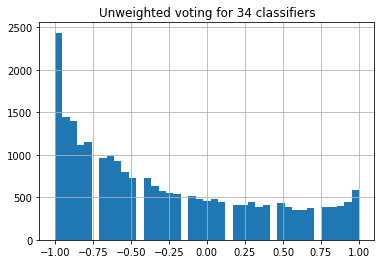

In [36]:
#this would be with unweighted voting

pd.Series(list(map(lambda x:x[0].item(),L_unlab.mean(axis=1)))).hist(bins=41)
plt.title('Unweighted voting for %i classifiers'%L_unlab.shape[1])

## Error analysis - Get some of the sentences which are predicted false by all classifiers

In [163]:
# linear_preds = pd.Series(list(map(lambda x:x[0].item(),L_unlab.mean(axis=1))))

In [162]:
# all_false_indices = [i for i in range(len(linear_preds))]

False

In [211]:
# all_false_indices = linear_preds[linear_preds==-1].index
# false_025_075 = linear_preds[(linear_preds<-0.25) & (linear_preds>-0.75)].index

In [198]:
# from random import sample

In [201]:
# import codecs

In [225]:
# with codecs.open('all_negative.txt','wb','utf-8') as f:
#     for i in sample(all_false_indices,50):
        
#         c = L_unlab.get_candidate(session, i)
#         chem = c.Chemical.get_span()
#         gene = c.Gene.get_span()
#         sentence = c.get_parent().text
        
#         doc = doc = c.get_parent().get_parent()
#         doc_name = doc.get_children()[0].text
        
#         string = '\t'.join((chem,'->',gene,' | ',sentence,' | Title: ',doc_name,'\n\n\n'))
#         f.write(string)
# #         print string

In [226]:
# # get titles
# with codecs.open('10-12_negative.txt','wb','utf-8') as f:
#     for i in sample(false_025_075,50):
        
#         c = L_unlab.get_candidate(session, i)
#         chem = c.Chemical.get_span()
#         gene = c.Gene.get_span()
#         sentence = c.get_parent().text
        
#         doc = doc = c.get_parent().get_parent()
#         doc_name = doc.get_children()[0].text
        
#         string = '\t'.join((chem,'->',gene,' | ',sentence,' | Title: ',doc_name,'\n\n\n'))
#         f.write(string)
# #         print string

## Randomly delete some negative values (about 50% of them). 
-> 
denoising doesn't work leaving code here for future reference though

In [26]:
# Randomly delete some negative values (about 50% of them). 
# However, this creates a bias towards positive class 
#  + denoising doesn't work

In [27]:
# neg_L_unlab = L_unlab==-1
# pos_L_unlab = L_unlab==1

In [28]:
# create a (random) mask

In [29]:
# from scipy.sparse import rand

# rand_csr = rand(L_unlab.shape[0], L_unlab.shape[1], density=0.5, format='csr')
# rand_csr.data[:] = 1

In [30]:
# L_unlab_subsampled = L_unlab.multiply(neg_L_unlab.multiply(rand_csr) + pos_L_unlab)

## Undersample examples having mean(votes) <0.5

 ** Code 1 and code 2 are same more or less run accordingly & delete **

In [ ]:
# code 1

In [32]:
# from MLutils import balance_candidates
# from utils import delete_from_csr

In [35]:
# #get a simple average of the classifiers prediction
# L_unlab_pred_lbls = list(map(lambda x: int(x[0].item()), L_unlab.mean(axis=1)>=0.5)) 

In [36]:
# indices = [i for i in range(L_unlab.shape[0])]

# ind_us, lbls_us = balance_candidates(indices, lbls)
# ind_to_del = list(set(indices).difference(set(ind_us)))

In [155]:
# L_unlab_us = delete_from_csr(L_unlab,row_indices=ind_to_del)


### Undersample dataset using the generative model

In [37]:
# from MLutils import balance_candidates
# from utils import delete_from_csr

In [38]:
# arr = np.fromiter(map(lambda x:x[0].item()>=0.5,L_unlab.mean(axis=1)), dtype=bool)
# lbls = arr*2-1
# indices = [i for i in range(L_unlab.shape[0])] # pass a list of indices into the undersampler
# ind_us, lbls_us = balance_candidates(indices, lbls)
# unlab_us = [unlab[i] for i in ind_us]
# pd.Series(lbls).hist()

In [42]:
# ind_to_del = list(set(indices).difference(set(ind_us)))
# print "Going to delete %i training examples from the unlabeled set\n%i examples remaining"%(
#     len(ind_to_del),L_unlab.shape[0]-len(ind_to_del))

Going to delete 69192 training examples from the unlabeled set
10208 examples remaining


In [45]:
# L_unlab_us = delete_from_csr(L_unlab,row_indices=ind_to_del)
# print "Initial size: %s\nNew size: %s"%(L_unlab.shape,L_unlab_us.shape)

Initial size: (79400, 12)
New size: (10208, 12)


# Denoising part

In [38]:

# # see how many LF vote on how many examples & with how many other LFs there are votes on common examples
# L_unlab.lf_stats(session)


## Find dependencies between LFs


In [37]:
from snorkel.learning.structure import DependencySelector
ds = DependencySelector()

In [38]:

# deps1 = ds.select(L_unlab, threshold=0.1)
# deps2 = ds.select(L_unlab, threshold=0.2)
# deps3 = ds.select(L_unlab, threshold=0.3)
# deps05 = ds.select(L_unlab, threshold=0.05)
# deps01 = ds.select(L_unlab, threshold=0.01)

# print len(deps01),len(deps05),len(deps1),len(deps2),len(deps3)

In [40]:
# Generate all possible dependencies with threshold from 0 to 0.15
all_deps = [ds.select(L_unlab, threshold=thresh) for thresh in np.array(range(5,15.1,2.5))/100.]
print list(map(lambda x: len(x) ,all_deps))
all_deps = list(np.unique(all_deps)) # delete duplicates for gridsearch
print list(map(lambda x: len(x) ,all_deps))


[204, 160, 122, 111, 93]
[93, 111, 122, 160, 204]


# GM training

In [47]:
## Error analysis on marginals (on dev set)
# Visualize true vs false labels on each histogram bin

def error_analysis():
    '''consider this a shortcut'''
    dev_marginals = gen_model.marginals(L_dev)

    dev_gold_lbls = neg_to_bin_labels(list(map(lambda x: int(x[0].item()),L_gold_dev.todense())))

    plot_marginals_histogram(dev_marginals,dev_gold_lbls ,
                             title = 'Histogram of marginals in val set' ,
                            bins = 11)


In [41]:
from snorkel.learning import RandomSearch, GenerativeModel, GridSearch

**  (with fixed params) **

In [42]:
# try some fixed params

In [43]:
%%time

# pick some params for training here

### Normal training

# actual training of the gen. model
from snorkel.learning import GenerativeModel

gen_model = GenerativeModel(lf_propensity=True, class_prior=False )

gen_model.train(
    L_unlab, decay=0.99, threads = 6, deps=all_deps[2], #reg_param = 1e-200, step_size = 10./L_unlab.shape[0],
    #epochs=50
)


Inferred cardinality: 2
CPU times: user 4min 12s, sys: 566 ms, total: 4min 12s
Wall time: 1min 51s


In [44]:
_ = gen_model.error_analysis(session, L_dev, L_gold_dev)

Scores (Un-adjusted)
Pos. class accuracy: 0.697
Neg. class accuracy: 0.82
Precision            0.521
Recall               0.697
F1                   0.596
----------------------------------------
TP: 495 | FP: 455 | TN: 2077 | FN: 215



In [45]:
%%time

# pick some params for training here

### Normal training

# actual training of the gen. model
from snorkel.learning import GenerativeModel

gen_model = GenerativeModel(lf_propensity=True, class_prior=False )

gen_model.train(
    L_unlab, decay=0.99, threads = 6, deps=all_deps[2], reg_param = 5e-2, #step_size = 10./L_unlab.shape[0],
    #epochs=50
)


Inferred cardinality: 2
CPU times: user 4min 7s, sys: 406 ms, total: 4min 7s
Wall time: 1min 46s


In [46]:
_ = gen_model.error_analysis(session, L_dev, L_gold_dev)

Scores (Un-adjusted)
Pos. class accuracy: 0.668
Neg. class accuracy: 0.832
Precision            0.527
Recall               0.668
F1                   0.589
----------------------------------------
TP: 474 | FP: 426 | TN: 2106 | FN: 236



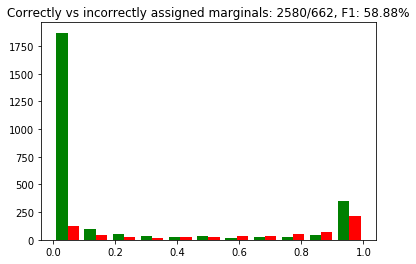

In [48]:
error_analysis()

** Load a previous model **

In [ ]:
# # Possibly load previously run model
# gen_model.load('GenerativeModel_8', save_dir='checkpoints/grid_search/')


In [ ]:
# _ = gen_model.error_analysis(session, L_dev, L_gold_dev)

** Hyperparameter search **

In [49]:
param_ranges = { # parameters for the train function of the GenerativeModel
    'step_size' : [10./L_unlab.shape[0],
                  5./L_unlab.shape[0],
                   15./L_unlab.shape[0]
                  ],
    'decay' : [0.99],
    'epochs' : [50],
    'reg_param': [1e-1,1e-2,1e-3, 1e-10],
    'deps': all_deps
}

model_class_params = {  # parameters for the GenerativeModel
    'lf_propensity': [True]
}

searcher = RandomSearch(GenerativeModel, param_ranges,  L_unlab, model_class_params = model_class_params , n=18 )


In [50]:
%%time
gen_model, run_stats = searcher.fit(L_dev, L_gold_dev, n_threads=6 )

Loading data...
Launching jobs...
Inferred cardinality: 2
Inferred cardinality: 2
Inferred cardinality: 2
Inferred cardinality: 2
Inferred cardinality: 2
Inferred cardinality: 2
[GenerativeModel] Model saved as <GenerativeModel_3>.
[GenerativeModel] Model saved as <GenerativeModel_2>.
[GenerativeModel] Model saved as <GenerativeModel_1>.
[GenerativeModel] Model saved as <GenerativeModel_4>.
[GenerativeModel] Model saved as <GenerativeModel_0>.
[GenerativeModel] Model saved as <GenerativeModel_5>.
Inferred cardinality: 2
Model 2 Done; score: 0.610500610501
Inferred cardinality: 2
Model 3 Done; score: 0.50799086758
Inferred cardinality: 2
Model 0 Done; score: 0.623471882641
Inferred cardinality: 2
Model 1 Done; score: 0.629882207068
Inferred cardinality: 2
Model 4 Done; score: 0.603773584906
Inferred cardinality: 2
Model 5 Done; score: 0.108377896613
[GenerativeModel] Model saved as <GenerativeModel_7>.
[GenerativeModel] Model saved as <GenerativeModel_8>.
[GenerativeModel] Model saved a

In [51]:
run_stats['#deps'] = list(map(lambda x: len(run_stats.deps[x]), run_stats.index)) # save # deps to identify 'deps'


In [52]:
run_stats

,Model,epochs,step_size,reg_param,deps,decay,Prec.,Rec.,F-1,#deps
3,1,50,0.000213,1.000000e-10,"{(2, 8, 0), (8, 9, 0), (21, 25, 0), (2, 13, 0)...",0.99,0.562569,0.715493,0.629882,93
13,15,50,0.000213,1.000000e-10,"{(2, 8, 0), (8, 9, 0), (21, 25, 0), (2, 13, 0)...",0.99,0.562569,0.715493,0.629882,93
2,0,50,0.000638,1.000000e-01,"{(2, 8, 0), (8, 9, 0), (21, 25, 0), (2, 13, 0)...",0.99,0.550756,0.718310,0.623472,93
0,2,50,0.000638,1.000000e-02,"{(1, 19, 0), (2, 8, 0), (8, 9, 0), (21, 25, 0)...",0.99,0.538793,0.704225,0.610501,111
8,10,50,0.000638,1.000000e-02,"{(1, 19, 0), (2, 8, 0), (8, 9, 0), (21, 25, 0)...",0.99,0.538793,0.704225,0.610501,111
7,8,50,0.000638,1.000000e-01,"{(9, 25, 0), (1, 19, 0), (2, 8, 0), (8, 9, 0),...",0.99,0.490351,0.787324,0.604324,160
4,4,50,0.000425,1.000000e-03,"{(9, 25, 0), (1, 19, 0), (2, 8, 0), (16, 19, 0...",0.99,0.459838,0.878873,0.603774,204
9,9,50,0.000213,1.000000e-01,"{(1, 19, 0), (2, 8, 0), (8, 9, 0), (29, 31, 0)...",0.99,0.515658,0.695775,0.592326,122
6,7,50,0.000213,1.000000e-01,"{(1, 19, 0), (2, 8, 0), (8, 9, 0), (21, 25, 0)...",0.99,0.516807,0.692958,0.592058,111
14,14,50,0.000638,1.000000e-01,"{(1, 19, 0), (2, 8, 0), (8, 9, 0), (29, 31, 0)...",0.99,0.502058,0.687324,0.580262,122


In [53]:
_ = gen_model.error_analysis(session, L_dev, L_gold_dev)

Scores (Un-adjusted)
Pos. class accuracy: 0.715
Neg. class accuracy: 0.844
Precision            0.563
Recall               0.715
F1                   0.63
----------------------------------------
TP: 508 | FP: 395 | TN: 2137 | FN: 202



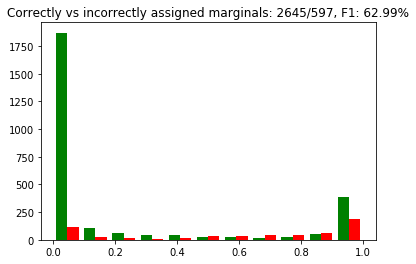

In [54]:
error_analysis()

# Select GM and proceed

In [ ]:
unlab_marginals = gen_model.marginals(L_unlab)

In [ ]:
plot_marginals_histogram(unlab_marginals, 
                         title = 'Histogram of marginals' ,
                        bins = 20)

In [ ]:
# save_marginals(session, L_unlab, unlab_marginals)

# Discriminative model learning

In [ ]:
from MLutils import balance_candidates

In [ ]:
from snorkel.learning import reRNN

In [ ]:
L_gold_test = load_gold_labels(session, annotator_name='gold', split=2)
L_gold_test

** Without GS **

In [ ]:
# plt.hist(unlab_marginals, bins=20)
# plt.title('Histogram of marginals with candidates undersampled before GM ')
# plt.show()

In [ ]:
### balance cands here to shuffle 
unlab_us, unlab_marginals_us = balance_candidates(unlab, unlab_marginals)

In [ ]:
train_kwargs = {
    'lr':         0.01,
    'dim':        100,
    'n_epochs':   40,
    'dropout':    0.25,
    'rebalance':  False,
    'print_freq': 1,
    'batch_size': 256
}



lstm = reRNN(seed=1701, n_threads=6,)
lstm.train(unlab_us, unlab_marginals_us , X_dev=dev, Y_dev=L_gold_dev, **train_kwargs)

# Compare with:
# [reRNN] Training model
# [reRNN] n_train=77026  #epochs=20  batch size=64
# [reRNN] Epoch 0 (367.34s)	Average loss=0.694420	Dev F1=22.09
# [reRNN] Epoch 1 (728.66s)	Average loss=0.693715	Dev F1=34.02
# [reRNN] Epoch 2 (1095.53s)	Average loss=0.688145	Dev F1=32.69
# [reRNN] Epoch 3 (1452.59s)	Average loss=0.681756	Dev F1=28.07
# [reRNN] Epoch 4 (1804.89s)	Average loss=0.675367	Dev F1=32.43
# [reRNN] Epoch 5 (2155.93s)	Average loss=0.669914	Dev F1=33.03
# [reRNN] Epoch 6 (2516.14s)	Average loss=0.667895	Dev F1=33.26
# [reRNN] Epoch 7 (2881.65s)	Average loss=0.663899	Dev F1=28.69
# [reRNN] Epoch 8 (3248.31s)	Average loss=0.660005	Dev F1=32.48
# [reRNN] Epoch 9 (3616.10s)	Average loss=0.656941	Dev F1=30.01

In [72]:
tp, fp, tn, fn = lstm.error_analysis(session, dev, L_gold_dev)

Scores (Un-adjusted)
Pos. class accuracy: 0.389
Neg. class accuracy: 0.538
Precision            0.191
Recall               0.389
F1                   0.256
----------------------------------------
TP: 276 | FP: 1171 | TN: 1361 | FN: 434



In [73]:
tp, fp, tn, fn = lstm.error_analysis(session, test, L_gold_test)

Scores (Un-adjusted)
Pos. class accuracy: 0.453
Neg. class accuracy: 0.536
Precision            0.237
Recall               0.453
F1                   0.311
----------------------------------------
TP: 899 | FP: 2891 | TN: 3346 | FN: 1085



# ~~~

** With GS ** 

In [397]:
from snorkel.annotations import load_marginals
train_labels = np.array([0 if train[x].gold_labels[0].value ==-1 else 1 for x in range(len(train))]) # load train labels to mix in LSTM
unlab_marginals = load_marginals(session, split=3)


In [398]:
train_us, train_labels_us = balance_candidates(train,train_labels)

In [399]:
train_unlab_marginals = np.append(train_labels_us, unlab_marginals_us)

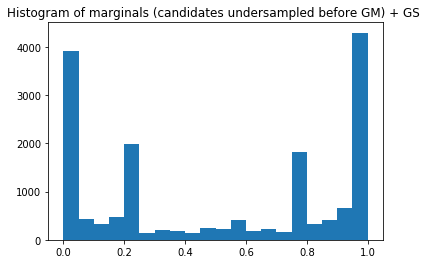

In [400]:
plt.hist(train_unlab_marginals, bins=20)
plt.title('Histogram of marginals (candidates undersampled before GM) + GS ')
plt.show()

In [401]:
train_kwargs = {
    'lr':         0.01,
    'dim':        100,
    'n_epochs':   25,
    'dropout':    0.5,
    'rebalance':  False,
    'print_freq': 1,
    'batch_size': 64
}

lstm = reRNN(seed=1701, n_threads=6)
lstm.train(train_us+unlab_us, train_unlab_marginals, X_dev=dev, Y_dev=L_gold_dev, **train_kwargs)


/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


[reRNN] Training model
[reRNN] n_train=16812  #epochs=25  batch size=64
[reRNN] Epoch 0 (88.69s)	Average loss=0.670389	Dev F1=39.58
[reRNN] Epoch 1 (184.20s)	Average loss=0.574475	Dev F1=38.89
[reRNN] Epoch 2 (275.40s)	Average loss=0.505027	Dev F1=39.16
[reRNN] Epoch 3 (366.70s)	Average loss=0.466436	Dev F1=37.59
[reRNN] Epoch 4 (454.71s)	Average loss=0.441739	Dev F1=38.47
[reRNN] Epoch 5 (542.95s)	Average loss=0.426697	Dev F1=38.74
[reRNN] Epoch 6 (634.96s)	Average loss=0.411845	Dev F1=39.47
[reRNN] Epoch 7 (728.01s)	Average loss=0.409247	Dev F1=38.63
[reRNN] Epoch 8 (819.16s)	Average loss=0.399574	Dev F1=37.49
[reRNN] Epoch 9 (908.25s)	Average loss=0.390756	Dev F1=37.85
[reRNN] Epoch 10 (997.79s)	Average loss=0.384978	Dev F1=38.67
[reRNN] Epoch 11 (1092.79s)	Average loss=0.378557	Dev F1=39.58
[reRNN] Epoch 12 (1187.15s)	Average loss=0.373485	Dev F1=39.83
[reRNN] Epoch 13 (1281.62s)	Average loss=0.368622	Dev F1=39.33
[reRNN] Epoch 14 (1375.18s)	Average loss=0.367330	Dev F1=38.88
[reRN

In [402]:
tp, fp, tn, fn = lstm.error_analysis(session, dev, L_gold_dev)

Scores (Un-adjusted)
Pos. class accuracy: 0.618
Neg. class accuracy: 0.578
Precision            0.29
Recall               0.618
F1                   0.395
----------------------------------------
TP: 436 | FP: 1066 | TN: 1459 | FN: 269



In [403]:
tp, fp, tn, fn = lstm.error_analysis(session, test, L_gold_test)

Scores (Un-adjusted)
Pos. class accuracy: 0.639
Neg. class accuracy: 0.542
Precision            0.304
Recall               0.639
F1                   0.412
----------------------------------------
TP: 1269 | FP: 2909 | TN: 3439 | FN: 718



# Train the generative model with altered coverage $\beta \simeq 0.38 $ 

In [161]:
%%time
### Normal training

# actual training of the gen. model
from snorkel.learning import GenerativeModel

gen_model = GenerativeModel(lf_propensity=True, class_prior=False )
gen_model.train(
    L_unlab_us, decay=0.95, step_size=0.1/L_unlab.shape[0], reg_param=1e-6,  threads = 6,
    deps=deps,
)


Inferred cardinality: 2
CPU times: user 37.8 s, sys: 71.6 ms, total: 37.9 s
Wall time: 16 s


In [162]:
gen_model.learned_lf_stats()

,Accuracy,Coverage,Precision,Recall
0,0.920615,0.8125,0.950539,0.742202
1,0.912340,0.7974,0.938179,0.726357
2,0.914920,0.8110,0.938644,0.744842
3,0.915871,0.8166,0.944155,0.747813
4,0.929098,0.8279,0.952712,0.768114
5,0.929640,0.8286,0.950627,0.775375
6,0.934440,0.8374,0.954281,0.785443
7,0.926912,0.8223,0.952234,0.763327
8,0.921424,0.8145,0.949029,0.749794
9,0.931904,0.8209,0.953322,0.771910


In [164]:
unlab_marginals_us = gen_model.marginals(L_unlab_us)

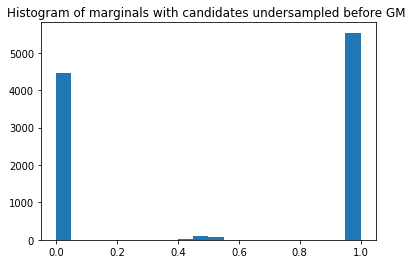

In [166]:
plt.hist(train_marginals_us, bins=20)
plt.title('Histogram of marginals with candidates undersampled before GM ')
plt.show()

# ~~~~

In [60]:
print 'Inferred performance metrics by snorkel:'
gen_model.learned_lf_stats()

Inferred performance metrics by snorkel:


,Accuracy,Coverage,Precision,Recall
0,0.971729,0.8737,0.797044,0.820487
1,0.937507,0.8369,0.629160,0.805274
2,0.925276,0.8324,0.575373,0.781947
3,0.895110,0.8037,0.492881,0.737323


## Check performance on developer set

In [63]:
gen_model.learned_lf_stats()

,Accuracy,Coverage,Precision,Recall
0,0.968743,0.8734,0.800826,0.850746
1,0.941741,0.8342,0.671815,0.763828
2,0.926562,0.8211,0.618130,0.760316
3,0.897070,0.8054,0.529931,0.738367


In [68]:
gen_model.weights.lf_accuracy

array([ 1.32927991,  0.96930229,  0.89196357,  0.71774052])

In [71]:
gen_model.score(L_dev,L_gold_dev)

(0.67838312829525482, 0.54751773049645391, 0.60596546310832033)

In [55]:
np.exp(-8*((.81+.79+.75+.73)/4)**2)

0.0087107272118617431

In [82]:
L_dev.lf_stats(session, L_gold_dev,)

,j,Coverage,Overlaps,Conflicts,TP,FP,FN,TN,Empirical Acc.
fasttext_fasttext,0,1.0,1.0,0.486687,324,225,381,2300,0.812384
"results_dict,ShortDepPath,RuS,CV_,bin_,minFreq=1,_ngrams=(0, 3),LSA100_SVC_linear",1,1.0,1.0,0.486687,508,459,197,2066,0.796904
"RuS,lr=0.001,dropout=0.25,8epochs,rebalance=0,max_sent_length=64_biLSTM",2,1.0,1.0,0.486687,446,519,259,2006,0.759133
"results_dict,lemmas,RuS,TfIdf_,minFreq=1,_ngrams=(1, 1),LSA100_RandomForestClassifier",3,1.0,1.0,0.486687,520,658,185,1867,0.739009


In [72]:
learned_stats = L_dev.lf_stats(session, L_gold_dev, gen_model.learned_lf_stats()['Accuracy'])
learned_stats

,j,Coverage,Overlaps,Conflicts,TP,FP,FN,TN,Empirical Acc.,Learned Acc.
fasttext_fasttext,0,1.0,1.0,0.486687,324,225,381,2300,0.812384,0.968112
"results_dict,ShortDepPath,RuS,CV_,bin_,minFreq=1,_ngrams=(0, 3),LSA100_SVC_linear",1,1.0,1.0,0.486687,508,459,197,2066,0.796904,0.935136
"RuS,lr=0.001,dropout=0.25,8epochs,rebalance=0,max_sent_length=64_biLSTM",2,1.0,1.0,0.486687,446,519,259,2006,0.759133,0.924378
"results_dict,lemmas,RuS,TfIdf_,minFreq=1,_ngrams=(1, 1),LSA100_RandomForestClassifier",3,1.0,1.0,0.486687,520,658,185,1867,0.739009,0.896389


### Try with priors = F1 score

In [87]:
gen_model_prior = GenerativeModel()

In [88]:
gen_model_prior.train(L_unlab, LF_acc_prior_weights=[0.5167, 0.60765, 0.5341, 0.5523 ])

Inferred cardinality: 2


In [83]:
# to pass priors as F1 score
from sklearn.metrics import f1_score

for row in learned_stats.iterrows():
    print row[0]
    tp = row[1]['TP']
    tn = row[1]['TN']
    fp = row[1]['FP']
    fn = row[1]['FN']
    pr = float(tp)/(tp+fp)
    rec = float(tp)/(tp+fn)
    f1 = (2*pr*rec)/(pr+rec)
    print f1

fasttext_fasttext
0.516746411483
results_dict,ShortDepPath,RuS,CV_,bin_,minFreq=1,_ngrams=(0, 3),LSA100_SVC_linear
0.607655502392
RuS,lr=0.001,dropout=0.25,8epochs,rebalance=0,max_sent_length=64_biLSTM
0.534131736527
results_dict,lemmas,RuS,TfIdf_,minFreq=1,_ngrams=(1, 1),LSA100_RandomForestClassifier
0.552310143388


In [260]:
# # export to latex
# print learned_stats.drop(labels=['j','Coverage', 'Overlaps', 'Conflicts'], axis=1).reset_index(drop=True).to_latex()

### Put it in a log

In [157]:
gen_model_prior_log = GenerativeModel()

In [158]:
# TODO: try this from  snorkel/test/learning/test_supervised.py


LF_acc_priors = [0.5167, 0.60765, 0.5341, 0.5523 ]
cardinality = 2
LF_acc_prior_weights = [0.5 * np.log((cardinality - 1.0) * x / (1 - x)) for x in LF_acc_priors]


In [159]:
LF_acc_prior_weights

[0.033412428221050325,
 0.2187223798716636,
 0.068306034261486848,
 0.10498400583011107]

In [160]:
gen_model_prior_log.train(L_unlab, LF_acc_prior_weights=LF_acc_prior_weights)

Inferred cardinality: 2


# ~

In [163]:
gen_model.weights.lf_accuracy

array([ 0.5167 ,  0.60765,  0.5341 ,  0.5523 ])

In [99]:
np.array([0.5167, 0.60765, 0.5341, 0.5523 ])

array([ 0.5167 ,  0.60765,  0.5341 ,  0.5523 ])

In [100]:
gen_model.weights.lf_accuracy = np.array([0.5167, 0.60765, 0.5341, 0.5523 ])

In [101]:
unlab_marginals_F1 = gen_model.marginals(L_unlab)

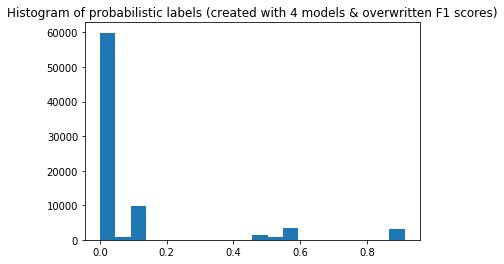

In [134]:
plt.hist(train_marginals_F1, bins=20)
plt.title('Histogram of probabilistic labels (created with %i models & overwritten F1 scores)'%n_models)
plt.show()

In [254]:
L_dev.lf_stats(session, L_gold_dev, gen_model.learned_lf_stats()['Accuracy'])

,j,Coverage,Overlaps,Conflicts,TP,FP,FN,TN,Empirical Acc.,Learned Acc.
fasttext_fasttext,0,1.0,1.0,0.486687,324,225,381,2300,0.812384,0.940637
"results_dict,ShortDepPath,RuS,CV_,bin_,minFreq=1,_ngrams=(0, 3),LSA100_SVC_linear",1,1.0,1.0,0.486687,508,459,197,2066,0.796904,0.910915
"RuS,lr=0.001,dropout=0.25,8epochs,rebalance=0,max_sent_length=64_biLSTM",2,1.0,1.0,0.486687,446,519,259,2006,0.759133,0.922221
"results_dict,lemmas,RuS,TfIdf_,minFreq=1,_ngrams=(1, 1),LSA100_RandomForestClassifier",3,1.0,1.0,0.486687,520,658,185,1867,0.739009,0.918230


Text(0.5,1,'Unweighted voting for 12 classifiers')

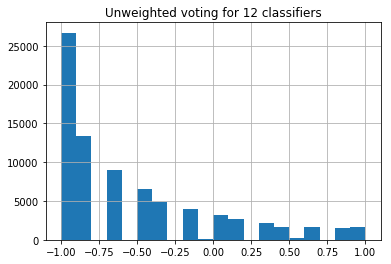

In [91]:
#this would be with unweighted voting

pd.Series(list(map(lambda x:x[0].item(),L_unlab.mean(axis=1)))).hist(bins=20)
plt.title('Unweighted voting for 12 classifiers')

In [136]:
import math
import numpy as np
import scipy.sparse as sparse
from multiprocessing import Process, Queue
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from snorkel.models import FeatureKey, GoldLabel, Sentence, Span, Candidate
from snorkel.learning.utils import print_scores

def majority_vote(L):
    '''Majority vote'''
    pred = L.sum(axis=1)
    pred[(pred > 0).nonzero()[0]] = 1
    pred[(pred < 0).nonzero()[0]] = 0
    return pred

def majority_vote_score(L, gold_labels):
    
    y_pred = np.ravel(majority_vote(L))
    y_true = gold_labels.todense()
    y_true = [1 if y_true[i] == 1 else 0 for i in range(y_true.shape[0])]
    
    pos,neg = y_true.count(1),float(y_true.count(0))
    print "pos/neg    {:d}:{:d} {:.1f}%/{:.1f}%".format(int(pos), int(neg), pos/(pos+neg)*100, neg/(pos+neg)*100)
    print "precision  {:.2f}".format( 100 * precision_score(y_true, y_pred) )
    print "recall     {:.2f}".format( 100 * recall_score(y_true, y_pred) )
    print "f1         {:.2f}".format( 100 * f1_score(y_true, y_pred) )
    #print "accuracy  {:.2f}".format( 100 * accuracy_score(y_true, y_pred) 


In [137]:
majority_vote_score(L_dev, L_gold_dev)

pos/neg    705:2525 21.8%/78.2%
precision  67.84
recall     54.75
f1         60.60


In [ ]:
logp_false = e^10
logp_true = e

In [ ]:
1 / (1 + np.exp(logp_false - logp_true))

In [154]:
gen_model.weights.dep_similar

<4x4 sparse matrix of type '<type 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

## save probabilistic labels for the LSTM  -  this is the # of train. examples our LSTM will train on

In [68]:
from snorkel.annotations import save_marginals
save_marginals(session, L_unlab, unlab_marginals)

Saved 79400 marginals


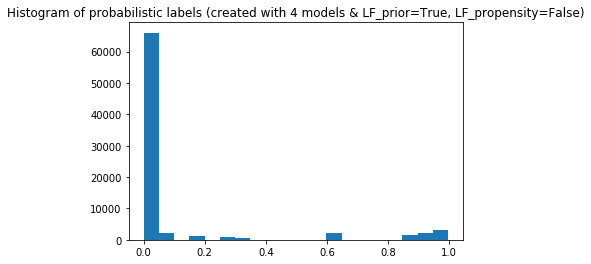

In [93]:
plt.hist(train_marginals, bins=20)
plt.title('Histogram of probabilistic labels (created with %i models & LF_prior=True, LF_propensity=False)'%n_models)
plt.show()

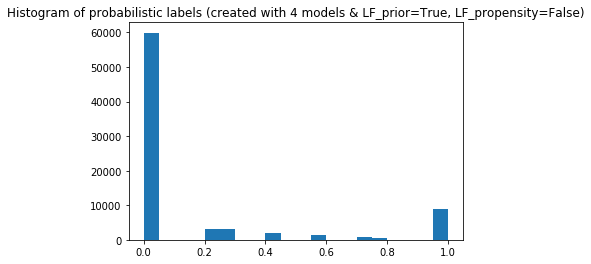

In [92]:
plt.hist(train_marginals_w_prior, bins=20)
plt.title('Histogram of probabilistic labels (created with %i models & LF_prior=True, LF_propensity=False)'%n_models)
plt.show()

# ~~ 

In [47]:
L_test = labeler.apply_existing(split=2)

Clearing existing...
Running UDF...
[========================================] 100%



In [49]:
# load from db gold labels
L_gold_test = load_gold_labels(session, annotator_name='gold', split=2)
L_gold_test

<13350x1 sparse matrix of type '<type 'numpy.int64'>'
	with 5781 stored elements in Compressed Sparse Row format>

In [50]:
_ = gen_model.error_analysis(session, L_test, L_gold_test)

Scores (Un-adjusted)
Pos. class accuracy: 0.259
Neg. class accuracy: 0.975
Precision            0.57
Recall               0.259
F1                   0.356
----------------------------------------
TP: 388 | FP: 293 | TN: 11557 | FN: 1112



In [51]:
L_test.lf_stats(session, L_gold_test, gen_model.learned_lf_stats()['Accuracy'])

,j,Coverage,Overlaps,Conflicts,TP,FP,FN,TN,Empirical Acc.,Learned Acc.
dummy,0,1.000000,0.433034,0.128764,0,0,1500,4281,0.740529,0.936173
LogisticRegression,1,0.433034,0.433034,0.128764,683,563,817,3718,0.761287,0.893057
SVC_linear,2,0.433034,0.433034,0.128764,594,592,906,3689,0.740875,0.888321
SVC_rbf_C100,3,0.433034,0.433034,0.128764,606,500,894,3781,0.758865,0.893826
SVC_rbf_C500,4,0.433034,0.433034,0.128764,625,484,875,3797,0.764920,0.897841
SVC_rbf_C1000,5,0.433034,0.433034,0.128764,577,480,923,3801,0.757308,0.899282
